In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
path = os.getcwd()+'\\photos'
save_path = os.getcwd()+'\\Hough_images'

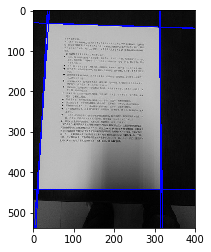

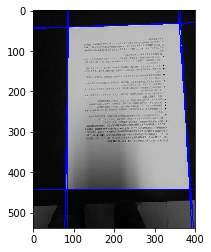

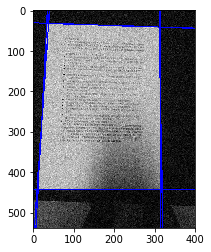

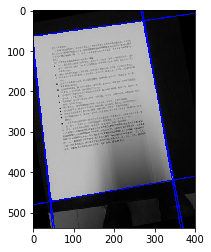

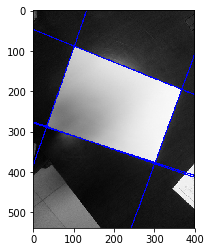

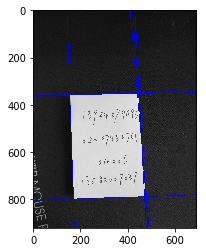

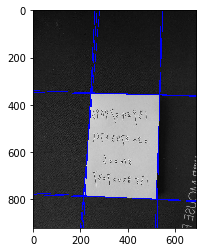

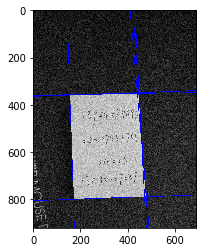

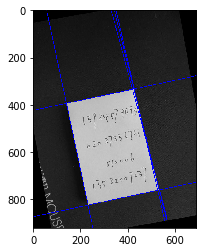

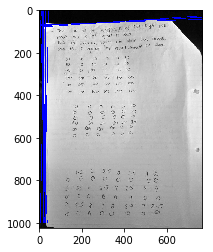

In [13]:
for filename in os.listdir(path)[0:10]:
    img = cv2.imread(os.path.join(path,filename),0)
    kernel = np.ones((5,5),np.uint8)
    opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    blur = cv2.GaussianBlur(opening,(1,1),0)
    ret3,th4 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) 
    laplacian = cv2.Laplacian(th4,cv2.CV_8UC1)
    cst = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
    minLineLength = 40
    maxLineGap = 10
    lines = cv2.HoughLines(laplacian,1,np.pi/180,100)
    for line in lines:
        for rho, theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
            cv2.line(cst, (x1, y1), (x2, y2), (0, 0, 255), 2)
    cv2.imwrite(os.path.join(save_path, filename), cst)
    plt.imshow(cst,cmap = 'gray')
    plt.show()